In [1]:
from mdrfep_utils.fep import *

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.39+release.59628fbc5bc09f1221e1642f1f8d157ce49b1410 2024-09-23T07:49:48] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.m1.cxx11thread.serialization.pyth

# This is what I used to make the figures that ultimately made it into my thesis. Not the most polished or efficient code by any means.

---

### <font color='red'> Define the directory containing the output of MDR-FEP </font>

In [4]:
results_dir = '/Users/owenrogers/PycharmProjects/MDRFEP/data/grid_search_results'

### <font color='red'> Create a list of different files in the directory, if they're present </font>

In [14]:
sfxns = ['hardrep', 'softrep']
mins = ['min', 'nomin']


correlations = []


for sfxn in sfxns:
    for mi in mins:
        correlations.append(os.path.join(results_dir, f'correlations_{sfxn}__{mi}__5.sc'))


all_data = []
for sfxn in sfxns:
    for mi in mins:
        all_data.append(os.path.join(results_dir, f'all_data_{sfxn}__{mi}__5.csv'))


mdrfep_files = []
for sfxn in sfxns:
    for mi in mins:
        mdrfep_files.append(os.path.join(results_dir, f'for_plotting_{sfxn}__{mi}__5.sc'))

# Density plots of all mutation values for each scorefunction

---

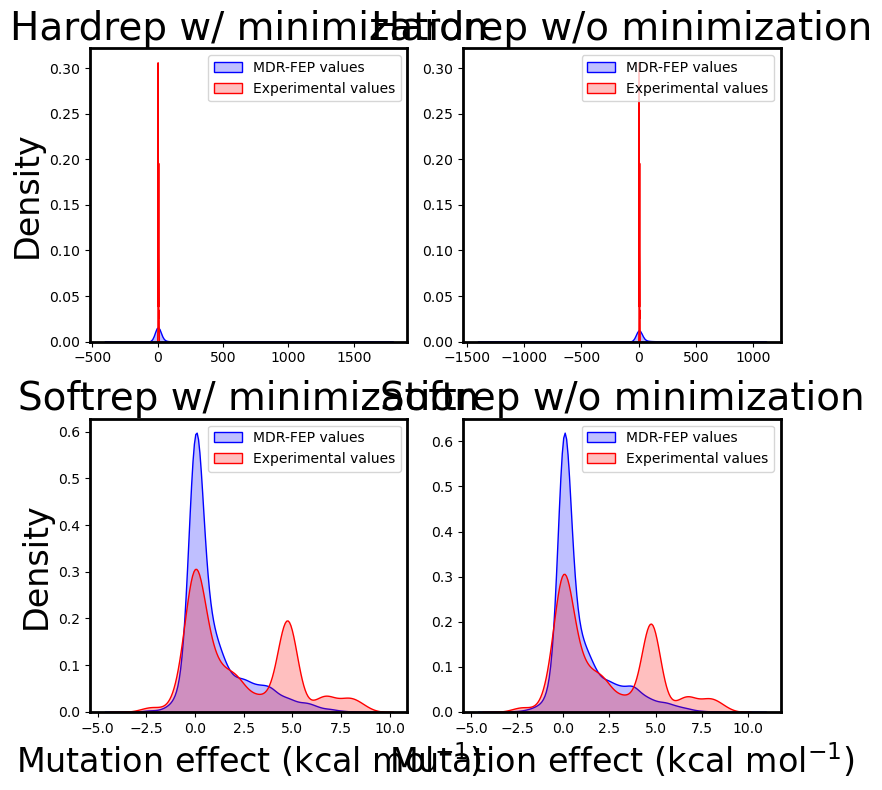

In [15]:
figure, axis = plt.subplots(2,2, figsize=(8, 8))


hr_min = pd.read_csv(mdrfep_files[0])
hr_min_name = os.path.basename(mdrfep_files[0]).replace('for_plotting_', '').replace('.sc', '')
sns.kdeplot(hr_min['ddg_rosetta'], ax=axis[0, 0], fill=True, color='blue', label='MDR-FEP values')
sns.kdeplot(hr_min['delta_exp_ddg_center'], ax=axis[0, 0], fill=True, color='red', label='Experimental values')
axis[0, 0].set_xlabel('')
axis[0, 0].set_ylabel('Density', fontsize=24)
axis[0, 0].set_title(f'{naming_dict.get(hr_min_name)}', fontsize=28)
axis[0, 0].legend()
axis[0, 0].spines['top'].set_linewidth(2)
axis[0, 0].spines['top'].set_color('black')
axis[0, 0].spines['right'].set_linewidth(2)
axis[0, 0].spines['right'].set_color('black')
axis[0, 0].spines['left'].set_linewidth(2)
axis[0, 0].spines['left'].set_color('black')
axis[0, 0].spines['bottom'].set_linewidth(2)
axis[0, 0].spines['bottom'].set_color('black')


hr_nomin = pd.read_csv(mdrfep_files[1])
hr_nomin_name = os.path.basename(mdrfep_files[1]).replace('for_plotting_', '').replace('.sc', '')
sns.kdeplot(hr_nomin['ddg_rosetta'], ax=axis[0, 1], fill=True, color='blue', label='MDR-FEP values')
sns.kdeplot(hr_nomin['delta_exp_ddg_center'], ax=axis[0, 1], fill=True, color='red', label='Experimental values')
axis[0, 1].set_xlabel('')
axis[0, 1].set_ylabel('', fontsize=24)
axis[0, 1].set_title(f'{naming_dict.get(hr_nomin_name)}', fontsize=28)
axis[0, 1].legend()
axis[0, 1].spines['top'].set_linewidth(2)
axis[0, 1].spines['top'].set_color('black')
axis[0, 1].spines['right'].set_linewidth(2)
axis[0, 1].spines['right'].set_color('black')
axis[0, 1].spines['left'].set_linewidth(2)
axis[0, 1].spines['left'].set_color('black')
axis[0, 1].spines['bottom'].set_linewidth(2)
axis[0, 1].spines['bottom'].set_color('black')


sr_min = pd.read_csv(mdrfep_files[2])
sr_min_name = os.path.basename(mdrfep_files[2]).replace('for_plotting_', '').replace('.sc', '')
sns.kdeplot(sr_min['ddg_rosetta'], ax=axis[1, 0], fill=True, color='blue', label='MDR-FEP values')
sns.kdeplot(sr_min['delta_exp_ddg_center'], ax=axis[1, 0], fill=True, color='red', label='Experimental values')
axis[1, 0].set_xlabel(r'$\mathrm{Mutation\ effect}\ (\mathrm{kcal\ mol^{-1}})$', fontsize=24)
axis[1, 0].set_ylabel('Density', fontsize=24)
axis[1, 0].set_title(f'{naming_dict.get(sr_min_name)}', fontsize=28)
axis[1, 0].legend()
axis[1, 0].spines['top'].set_linewidth(2)
axis[1, 0].spines['top'].set_color('black')
axis[1, 0].spines['right'].set_linewidth(2)
axis[1, 0].spines['right'].set_color('black')
axis[1, 0].spines['left'].set_linewidth(2)
axis[1, 0].spines['left'].set_color('black')
axis[1, 0].spines['bottom'].set_linewidth(2)
axis[1, 0].spines['bottom'].set_color('black')


sr_nomin = pd.read_csv(mdrfep_files[3])
sr_nomin_name = os.path.basename(mdrfep_files[3]).replace('for_plotting_', '').replace('.sc', '')
sns.kdeplot(sr_nomin['ddg_rosetta'], ax=axis[1, 1], fill=True, color='blue', label='MDR-FEP values')
sns.kdeplot(sr_nomin['delta_exp_ddg_center'], ax=axis[1, 1], fill=True, color='red', label='Experimental values')
axis[1, 1].set_xlabel(r'$\mathrm{Mutation\ effect}\ (\mathrm{kcal\ mol^{-1}})$', fontsize=24)
axis[1, 1].set_ylabel('')
axis[1, 1].set_title(f'{naming_dict.get(sr_nomin_name)}', fontsize=28)
axis[1, 1].legend()
axis[1, 1].spines['top'].set_linewidth(2)
axis[1, 1].spines['top'].set_color('black')
axis[1, 1].spines['right'].set_linewidth(2)
axis[1, 1].spines['right'].set_color('black')
axis[1, 1].spines['left'].set_linewidth(2)
axis[1, 1].spines['left'].set_color('black')
axis[1, 1].spines['bottom'].set_linewidth(2)
axis[1, 1].spines['bottom'].set_color('black')

plt.tight_layout()
#plt.savefig('mutation_density.png', dpi=300, transparent=True)
plt.show()
plt.close()

# Density plots for monomer_surface

---

Text(0.5, 0, '$\\mathrm{Mutation\\ effect}\\ (\\mathrm{kcal\\ mol^{-1}})$')

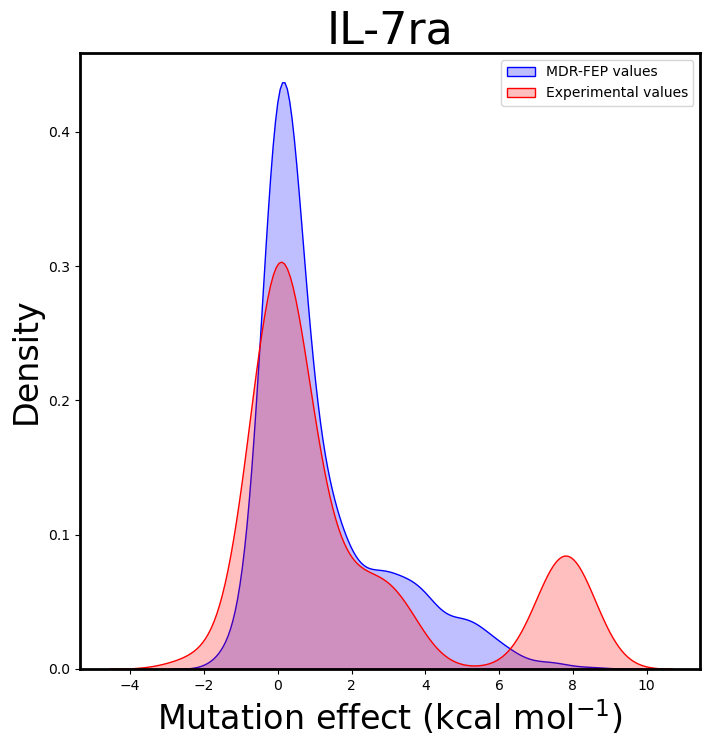

In [9]:
fog, ox = plt.subplots(figsize=(8, 8))

mdrfep_data = pd.read_csv(mdrfep_files[2])
protein_subdf = mdrfep_data[mdrfep_data['ssm_parent'] == protein_list[0]]
sns.kdeplot(protein_subdf['ddg_rosetta'], ax=ox, fill=True, color='blue', label='MDR-FEP values')
sns.kdeplot(protein_subdf['delta_exp_ddg_center'], ax=ox, fill=True, color='red', label='Experimental values')
plt.grid(False)

ox.set_ylabel('Density', fontsize=24)
ox.set_title(f'{protein_dict.get(protein_list[0])}', fontsize=32) # gives an error because naming_dict defined below
ox.legend()
ox.spines['top'].set_linewidth(2)
ox.spines['top'].set_color('black')
ox.spines['right'].set_linewidth(2)
ox.spines['right'].set_color('black')
ox.spines['left'].set_linewidth(2)
ox.spines['left'].set_color('black')
ox.spines['bottom'].set_linewidth(2)
ox.spines['bottom'].set_color('black')
ox.set_ylabel('Density', fontsize=24)

ox.set_xlabel(r'$\mathrm{Mutation\ effect}\ (\mathrm{kcal\ mol^{-1}})$', fontsize=24)
#plt.savefig('il7ra_dist.png', dpi=300, transparent=True)

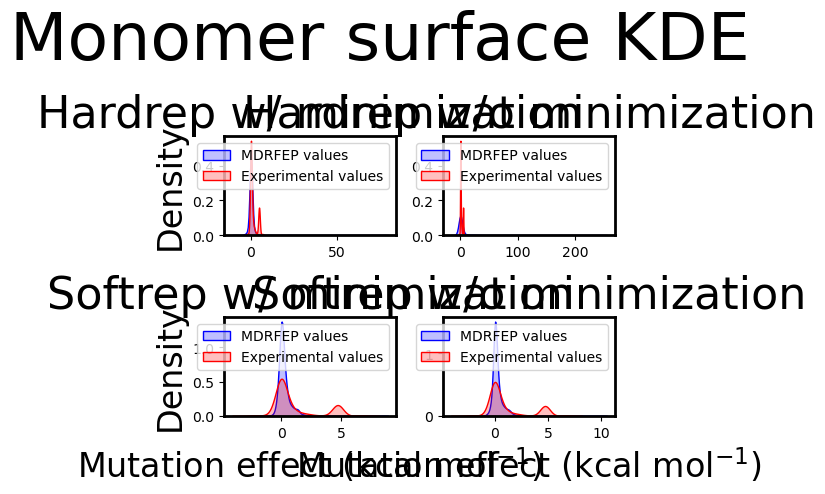

In [16]:
figure1, axis = plt.subplots(2, 2, figsize=(5, 5))

   
# first one 
for_monsurf0 = pd.read_csv(mdrfep_files[0])
for_monsurf_name0 = os.path.basename(mdrfep_files[0]).replace('for_plotting_', '').replace('.sc', '')
monsurf0 = for_monsurf0[for_monsurf0['is_monomer_surface'] == True]
sns.kdeplot(monsurf0['ddg_rosetta'], ax=axis[0, 0], fill=True, color='blue', label='MDRFEP values')
sns.kdeplot(monsurf0['delta_exp_ddg_center'], ax=axis[0, 0], fill=True, color='red', label='Experimental values')
#axis[0, 0].set_xlabel(r'$\mathrm{Mutation\ effect}\ (\mathrm{kcal\ mol^{-1}})$', fontsize=24)
axis[0, 0].set_xlabel('')
axis[0, 0].set_ylabel('Density', fontsize=24)
axis[0, 0].set_title(f'{naming_dict.get(for_monsurf_name0)}', fontsize=32) # gives an error because naming_dict defined below
axis[0, 0].legend()
axis[0, 0].spines['top'].set_linewidth(2)
axis[0, 0].spines['top'].set_color('black')
axis[0, 0].spines['right'].set_linewidth(2)
axis[0, 0].spines['right'].set_color('black')
axis[0, 0].spines['left'].set_linewidth(2)
axis[0, 0].spines['left'].set_color('black')
axis[0, 0].spines['bottom'].set_linewidth(2)
axis[0, 0].spines['bottom'].set_color('black')


# second one
for_monsurf1 = pd.read_csv(mdrfep_files[1])
for_monsurf_name1 = os.path.basename(mdrfep_files[1]).replace('for_plotting_', '').replace('.sc', '')
monsurf1 = for_monsurf1[for_monsurf1['is_monomer_surface'] == True]
sns.kdeplot(monsurf1['ddg_rosetta'], ax=axis[0, 1], fill=True, color='blue', label='MDRFEP values')
sns.kdeplot(monsurf1['delta_exp_ddg_center'], ax=axis[0, 1], fill=True, color='red', label='Experimental values')
#axis[0, 1].set_xlabel(r'$\mathrm{Mutation\ effect}\ (\mathrm{kcal\ mol^{-1}})$', fontsize=24)
axis[0, 1].set_xlabel('')
axis[0, 1].set_ylabel('', fontsize=24)
axis[0, 1].set_title(f'{naming_dict.get(for_monsurf_name1)}', fontsize=32) # gives an error because naming_dict defined below
axis[0, 1].legend()
axis[0, 1].spines['top'].set_linewidth(2)
axis[0, 1].spines['top'].set_color('black')
axis[0, 1].spines['right'].set_linewidth(2)
axis[0, 1].spines['right'].set_color('black')
axis[0, 1].spines['left'].set_linewidth(2)
axis[0, 1].spines['left'].set_color('black')
axis[0, 1].spines['bottom'].set_linewidth(2)
axis[0, 1].spines['bottom'].set_color('black')


# third one
for_monsurf2 = pd.read_csv(mdrfep_files[2])
for_monsurf_name2 = os.path.basename(mdrfep_files[2]).replace('for_plotting_', '').replace('.sc', '')
monsurf2 = for_monsurf2[for_monsurf2['is_monomer_surface'] == True]
sns.kdeplot(monsurf2['ddg_rosetta'], ax=axis[1, 0], fill=True, color='blue', label='MDRFEP values')
sns.kdeplot(monsurf2['delta_exp_ddg_center'], ax=axis[1, 0], fill=True, color='red', label='Experimental values')
axis[1, 0].set_xlabel(r'$\mathrm{Mutation\ effect}\ (\mathrm{kcal\ mol^{-1}})$', fontsize=24)
axis[1, 0].set_ylabel('Density', fontsize=24)
axis[1, 0].set_title(f'{naming_dict.get(for_monsurf_name2)}', fontsize=32) # gives an error because naming_dict defined below
axis[1, 0].legend()
axis[1, 0].spines['top'].set_linewidth(2)
axis[1, 0].spines['top'].set_color('black')
axis[1, 0].spines['right'].set_linewidth(2)
axis[1, 0].spines['right'].set_color('black')
axis[1, 0].spines['left'].set_linewidth(2)
axis[1, 0].spines['left'].set_color('black')
axis[1, 0].spines['bottom'].set_linewidth(2)
axis[1, 0].spines['bottom'].set_color('black')


# fourth one
for_monsurf3 = pd.read_csv(mdrfep_files[3])
for_monsurf_name3 = os.path.basename(mdrfep_files[3]).replace('for_plotting_', '').replace('.sc', '')
monsurf3 = for_monsurf3[for_monsurf3['is_monomer_surface'] == True]
sns.kdeplot(monsurf3['ddg_rosetta'], ax=axis[1, 1], fill=True, color='blue', label='MDRFEP values')
sns.kdeplot(monsurf3['delta_exp_ddg_center'], ax=axis[1, 1], fill=True, color='red', label='Experimental values')
axis[1, 1].set_xlabel(r'$\mathrm{Mutation\ effect}\ (\mathrm{kcal\ mol^{-1}})$', fontsize=24)
axis[1, 1].set_ylabel('', fontsize=24)
axis[1, 1].set_title(f'{naming_dict.get(for_monsurf_name3)}', fontsize=32) # gives an error because naming_dict defined below
axis[1, 1].legend()
axis[1, 1].spines['top'].set_linewidth(2)
axis[1, 1].spines['top'].set_color('black')
axis[1, 1].spines['right'].set_linewidth(2)
axis[1, 1].spines['right'].set_color('black')
axis[1, 1].spines['left'].set_linewidth(2)
axis[1, 1].spines['left'].set_color('black')
axis[1, 1].spines['bottom'].set_linewidth(2)
axis[1, 1].spines['bottom'].set_color('black')


# naming and stuff
plt.suptitle('Monomer surface KDE', fontsize=48)
plt.tight_layout()
#plt.savefig(f'monomer_surface_plots.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()
plt.close()

#### Calculate the accuracy - only need to do this for one file because all of their data is the same

In [17]:
# get one of the files from all_data
for_their_accuracy = all_data[2]

# make a dataframe
for_their_accuracy_df = pd.read_csv(for_their_accuracy)

# get the basename 
for_their_accuracy_name = os.path.basename(for_their_accuracy).replace('all_data_', '').replace('.csv', '')

In [18]:
def get_their_accuracy(df):
    
    df = df[(True & (df['ssm_letter'] != 'C')
                             & (df['ssm_letter'] != 'P')
                             & (df['parent_letter'] != 'C')
                             & (~df['low_conf'] & ~df['avid_doesnt_agree'])
                             & ~(df['delta_exp_ddg_lb'].isnull() & df['delta_exp_ddg_ub'].isnull())
                             & (np.isfinite(df['delta_exp_ddg_ub']) | np.isfinite(df['delta_exp_ddg_lb']))
                             & (~df['is_loop'])
                             )]
    
    their_within_bounds = ((df['delta_rosetta_ub'].values + 1 > df['delta_exp_ddg_lb'].values)
                           | np.isnan(df['delta_exp_ddg_lb'].values))
    their_within_bounds &= ((df['delta_rosetta_lb'].values - 1 < df['delta_exp_ddg_ub'].values)
                            | np.isnan(df['delta_exp_ddg_ub'].values))
    df['rosetta_agrees'] = their_within_bounds
    
    return df

In [19]:
# make a dataframe for getting the accuracy

acc_df = get_their_accuracy(for_their_accuracy_df)

/var/folders/v6/qq7d_7y975z25lpwfw296tz40000gn/T/ipykernel_53196/300534241.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rosetta_agrees'] = their_within_bounds


In [20]:
def average_bounds(df):
    
    df['mean_delta_rosetta'] = (df['delta_rosetta_ub'] + df['delta_rosetta_lb']) / 2
    
    return df

###

---

In [21]:
their_accuracy = {'overall': [],
                  'intcore': [],
                  'intbound': [],
                  'monsurf': [],
                  'moncore': [],
                  'monbound': [],
                  'bcov': [],
                  'motif': [],
                  'ems': [],
                  'longxing': [],
                  'newr1': []}


their_accuracy['overall'].append(np.sum(acc_df['rosetta_agrees']) / len(acc_df))

their_accuracy['intcore'].append(np.sum(acc_df[acc_df['is_interface_core'] == True]['rosetta_agrees']) / len(acc_df[acc_df['is_interface_core'] == True]))

their_accuracy['intbound'].append(np.sum(acc_df[acc_df['is_interface_boundary'] == True]['rosetta_agrees']) / len(acc_df[acc_df['is_interface_boundary'] == True]))

their_accuracy['monsurf'].append(np.sum(acc_df[acc_df['is_monomer_surface'] == True]['rosetta_agrees']) / len(acc_df[acc_df['is_monomer_surface'] == True]))

their_accuracy['moncore'].append(np.sum(acc_df[acc_df['is_monomer_core'] == True]['rosetta_agrees']) / len(acc_df[acc_df['is_monomer_core'] == True]))

their_accuracy['monbound'].append(np.sum(acc_df[acc_df['is_monomer_boundary'] == True]['rosetta_agrees']) / len(acc_df[acc_df['is_monomer_boundary'] == True]))

their_accuracy['bcov'].append(np.sum(acc_df[acc_df['ssm_parent'] == protein_list[0]]['rosetta_agrees']) / len(acc_df[acc_df['ssm_parent'] == protein_list[0]]))

their_accuracy['motif'].append(np.sum(acc_df[acc_df['ssm_parent'] == protein_list[1]]['rosetta_agrees']) / len(acc_df[acc_df['ssm_parent'] == protein_list[1]]))

their_accuracy['ems'].append(np.sum(acc_df[acc_df['ssm_parent'] == protein_list[2]]['rosetta_agrees']) / len(acc_df[acc_df['ssm_parent'] == protein_list[2]]))

their_accuracy['longxing'].append(np.sum(acc_df[acc_df['ssm_parent'] == protein_list[3]]['rosetta_agrees']) / len(acc_df[acc_df['ssm_parent'] == protein_list[3]]))

their_accuracy['newr1'].append(np.sum(acc_df[acc_df['ssm_parent'] == protein_list[4]]['rosetta_agrees']) / len(acc_df[acc_df['ssm_parent'] == protein_list[4]]))

In [22]:
acc_df = average_bounds(acc_df)

/var/folders/v6/qq7d_7y975z25lpwfw296tz40000gn/T/ipykernel_53196/2094111420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_delta_rosetta'] = (df['delta_rosetta_ub'] + df['delta_rosetta_lb']) / 2


# Binning amino acid mutations by the ∆volume in angstyrom

---

In [23]:
from io import StringIO
"""
from https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/abbreviation.html#refs
"""


volumes = StringIO("""
amino_acid three_letter one_letter mass num_atoms volume hydropathy_index
Alanine	Ala	A	89	13	88.6	1.8
Arginine	Arg	R	174	26	173.4	-4.5
Asparagine	Asn	N	132	17	114.1	-3.5
Aspartic_acid	Asp	D	133	16	111.1	-3.5				
Cysteine	Cys	C	121	14	108.5	2.5
Glutamine	Gln	Q	146	20	143.8	-3.5
Glutamic_Acid	Glu	E	147	19	138.4	-3.5			
Glycine	Gly	G	75	10	60.1	-0.4
Histidine	His	H	155	20	153.2	-3.2
Isoleucine	Ile	I	131	22	166.7	4.5
Leucine	Leu	L	131	22	166.7	3.8
Lysine	Lys	K	146	24	168.6	-3.9
Methionine	Met	M	149	20	162.9	1.9
Phenylalanine	Phe	F	165	23	189.9	2.8
Proline	Pro	P	115	17	112.7	-1.6
Serine	Ser	S	105	14	89.0	-0.8
Threonine	Thr	T	119	17	116.1	-0.7
Tryptophan	Trp	W	204	27	227.8	-0.9
Tyrosine	Tyr	Y	181	24	193.6	-1.3
Valine	Val	V	117	19	140.0	4.2
""")
df = pd.read_csv(volumes, sep=r'\s+')
# get the i and j vectors of the volume
i_vec = np.array(df['volume'])
j_vec = np.array(df['volume'])

# broadcast together to made a ∆size matrix
delta_change = i_vec[None, :] - j_vec[:, None]
i_name_vec = df['one_letter']
j_name_vec = df['one_letter']
dchange = pd.DataFrame(delta_change, index=i_name_vec, columns=j_name_vec)

# mdrfep_files contains all of the Rosetta data, so here is where you would evaluate MDR-FEP's ability to predict mutations to Alanine

---

#### For this, I should narrow the focus to the monomer and interface core, and only to mutations FROM hydrophobic residues

In [27]:
dataf = pd.read_csv(f'{results_dir}/softrep__min__5_mdrfep_output.sc')
name = os.path.basename(os.path.join(results_dir, 'softrep__min__5_mdrfep_output.sc')).replace('_mdrfep_output', '').replace('.sc', '')
print(f'Working on {name}')

Working on softrep__min__5


In [28]:
mdrfep_point_estimates = pd.read_csv(mdrfep_files[2])

In [29]:
mdrfep_point_estimates = mdrfep_point_estimates[['ssm_parent', 'ssm_seqpos', 'ssm_letter', 'ddg_rosetta']]

In [30]:
merged = dataf.merge(mdrfep_point_estimates, 
                     'left',
                     list(dataf.columns.intersection(mdrfep_point_estimates.columns)))

In [31]:
with_native = merged.merge(acc_df, 'left', list(merged.columns.intersection(acc_df.columns)))

In [32]:
with_native['dvolume'] = with_native.apply(
    lambda row: dchange.loc[row['parent_letter'], row['ssm_letter']], axis=1
)

In [33]:
# Look at effect of mutating FROM hydrophobic amino aicds 


with_native = with_native[with_native['parent_letter'].isin(['A', 'I', 'L', 'M', 'F', 'W', 'Y', 'V'])]

### quick little density plot for monomer core distributions

---

In [34]:
bins = [-150, -100, -50, 0, 50, 100, 150]

with_native['bin'] = pd.cut(with_native['dvolume'], bins=bins)

In [35]:
dens = True

In [36]:
if dens:
    density = with_native.copy()

    density = density[density['is_interface_core'] == True]

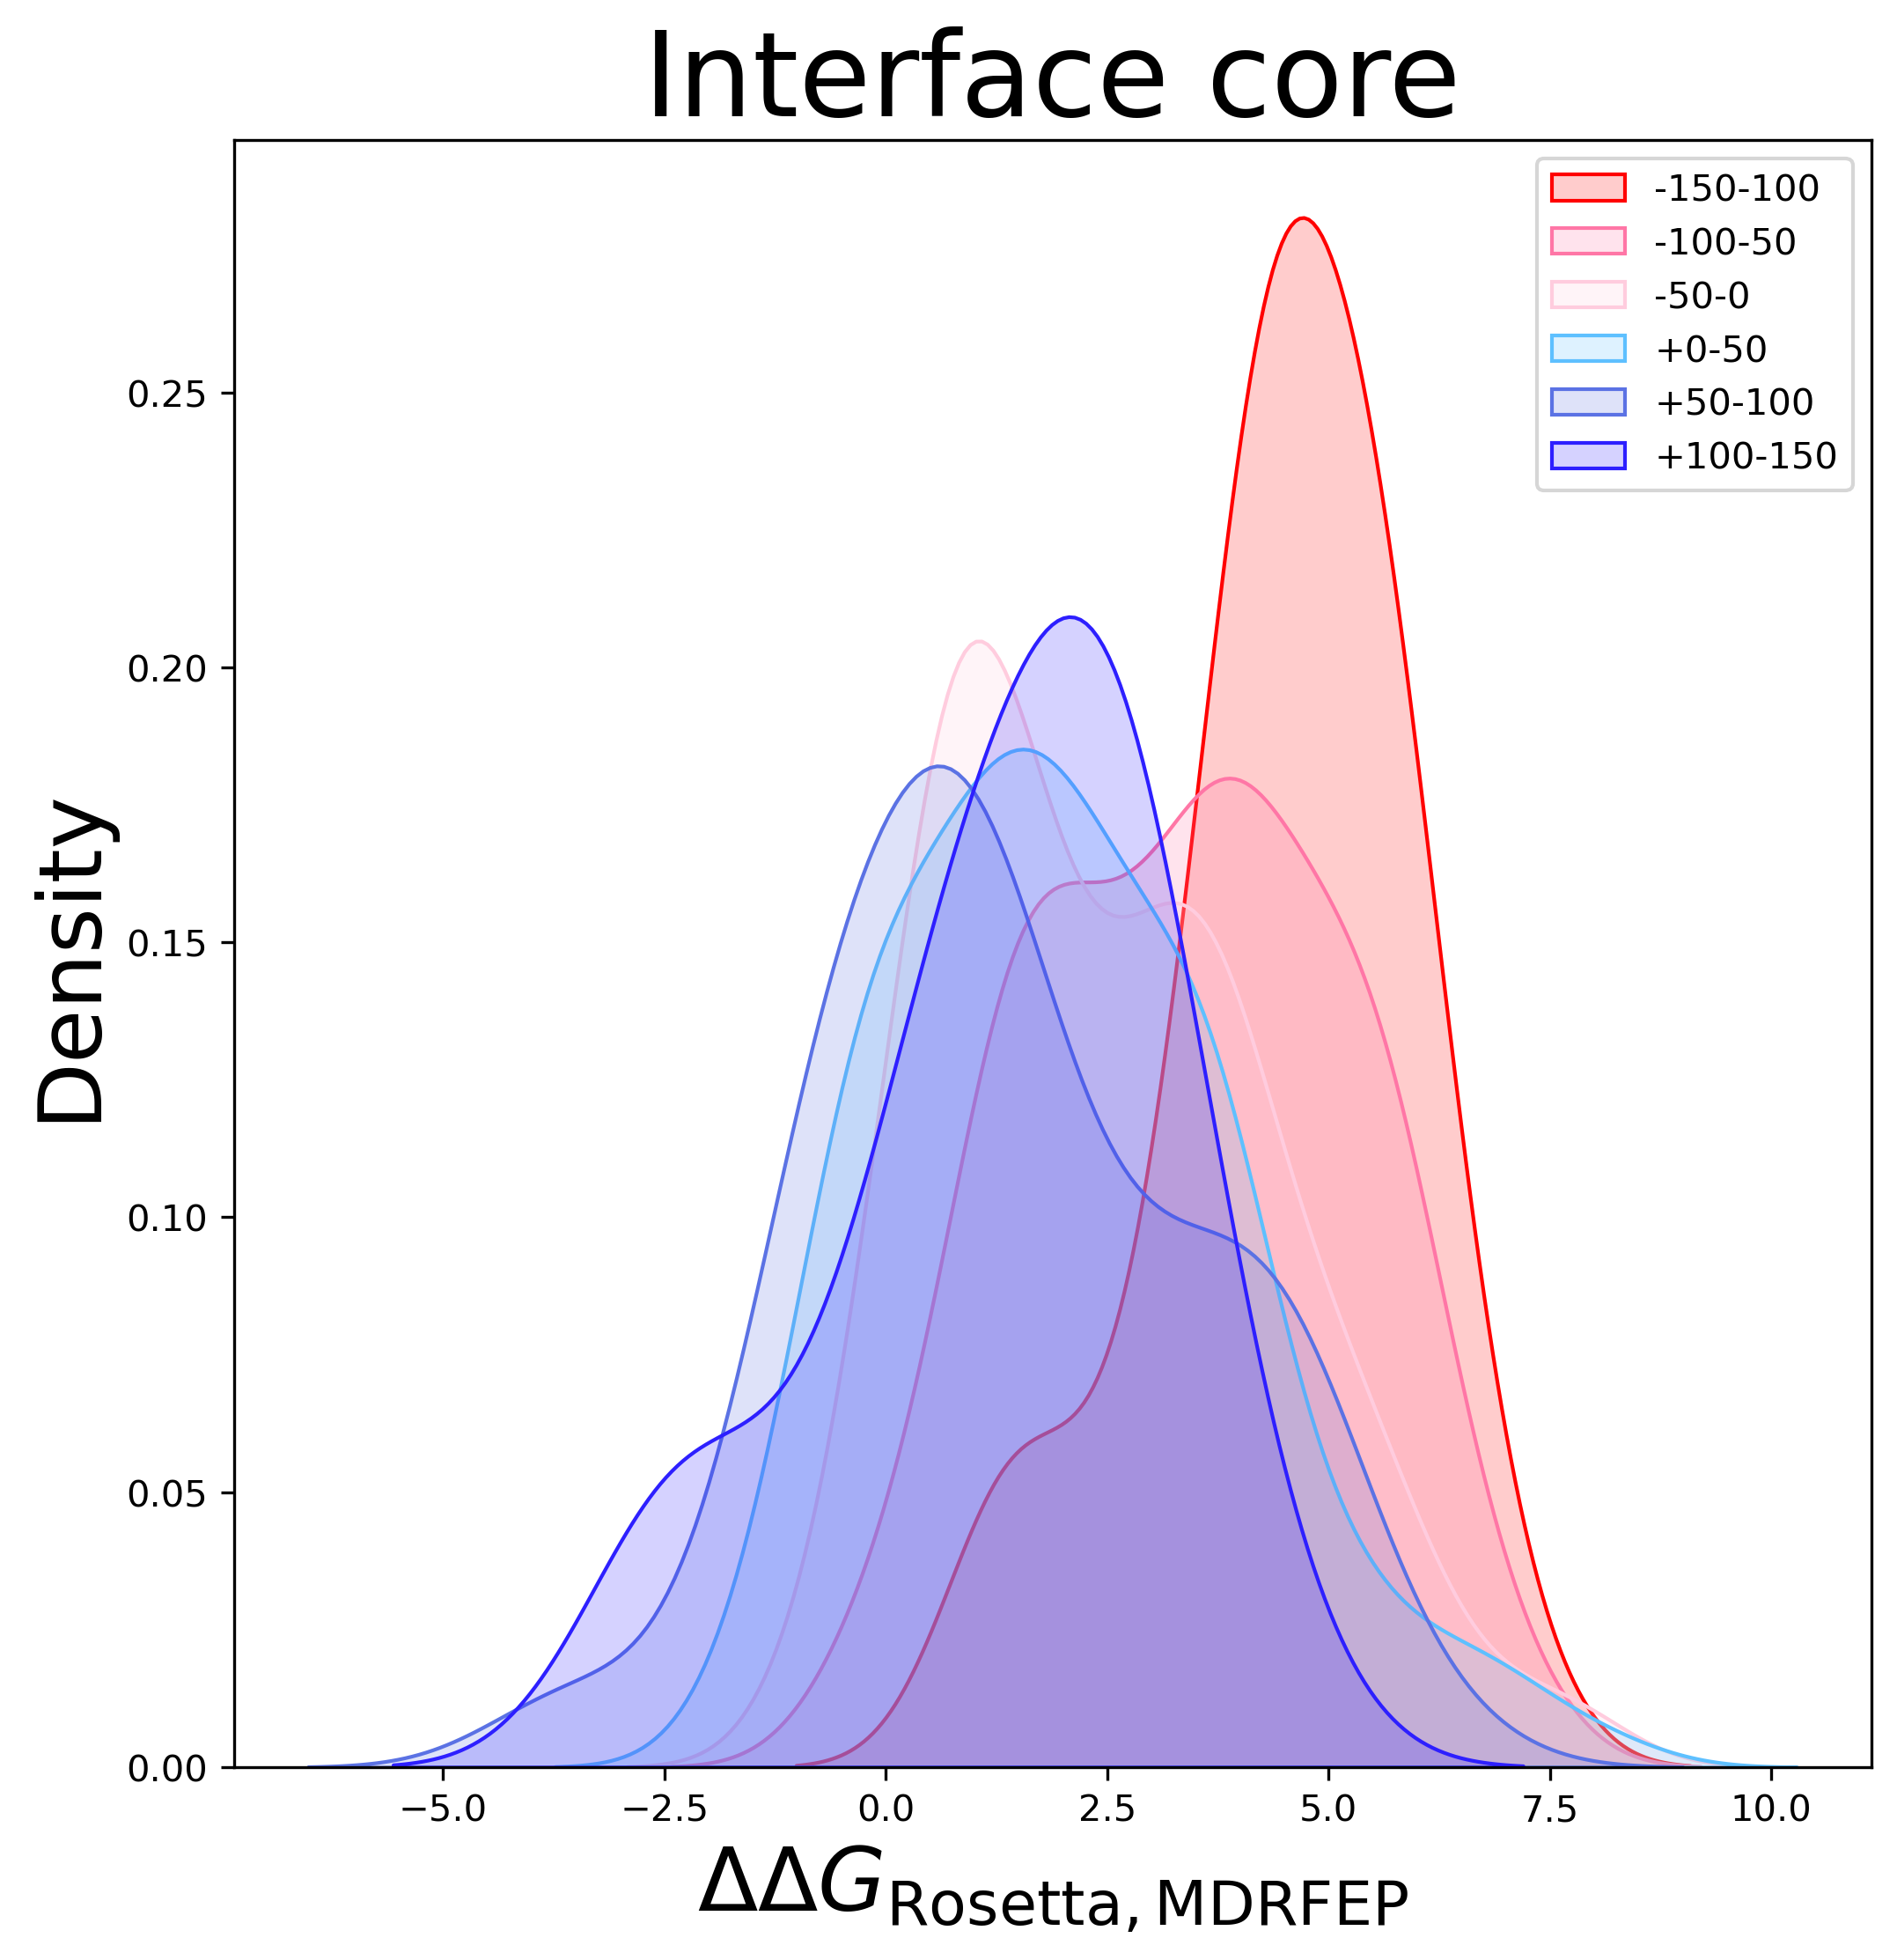

In [37]:
if dens:
    pig, pax = plt.subplots(figsize=(8, 8), dpi=300)
    
    apha = 0.2
    
    sns.kdeplot(density[density['bin'] == pd.Interval(-150, -100, closed='right')]['ddg_rosetta'], ax=pax, fill=True, label='-150-100', color='#ff0000', alpha=apha)
    sns.kdeplot(density[density['bin'] == pd.Interval(-100, -50, closed='right')]['ddg_rosetta'], ax=pax, fill=True, label='-100-50', color='#ff76a6', alpha=apha)
    sns.kdeplot(density[density['bin'] == pd.Interval(-50, 0, closed='right')]['ddg_rosetta'], ax=pax, fill=True, label='-50-0', color='#ffccde', alpha=apha)
    sns.kdeplot(density[density['bin'] == pd.Interval(0, 50, closed='right')]['ddg_rosetta'], ax=pax, fill=True, label='+0-50', color='#5ec0ff', alpha=apha)
    sns.kdeplot(density[density['bin'] == pd.Interval(50, 100, closed='right')]['ddg_rosetta'], ax=pax, fill=True, label='+50-100', color='#5b72e4', alpha=apha)
    sns.kdeplot(density[density['bin'] == pd.Interval(100, 150, closed='right')]['ddg_rosetta'], ax=pax, fill=True, label='+100-150', color='#2d1fff', alpha=apha)
    
    plt.title('Interface core', fontsize=32)
    plt.xlabel(r'$\Delta\Delta G_{\mathrm{Rosetta, MDRFEP}}$', fontsize=24)
    plt.ylabel('Density', fontsize=24)
    plt.legend()
    plt.grid(False)
    #plt.savefig('intcore_density_vs_size.png', dpi=300)
    plt.show()

In [38]:
metric = 'accuracy'

if metric == 'accuracy':
    percent_sub = with_native[
                ~(with_native['is_monomer_surface'] == True)
                ].groupby('bin', observed=True)['mdrfep_agrees'].mean() * 100
    
if metric == 'correlation':
    
    corrs = []
    with_native = with_native[~(with_native['is_monomer_surface'] == True)]
    
    grouped = with_native.groupby('bin', observed=True)
    for name, subdf in with_native.groupby('bin'):
        
        corr = pearsonr(subdf['ddg_rosetta'], subdf['delta_exp_ddg_center'])[0]
        corrs.append({'bin': name, 'corr': corr})
        
    corrsdf = pd.DataFrame(corrs)
    
    percent_sub = with_native.merge(corrsdf, 'left', 'bin')

In [39]:
if metric == 'correlation':
    percent_sub = percent_sub.groupby('bin')['corr'].mean()
    

In [40]:
to_plot = percent_sub.reset_index()
to_plot.columns = ['bin', 'percent_agree']

In [41]:
sns.set_style('whitegrid')

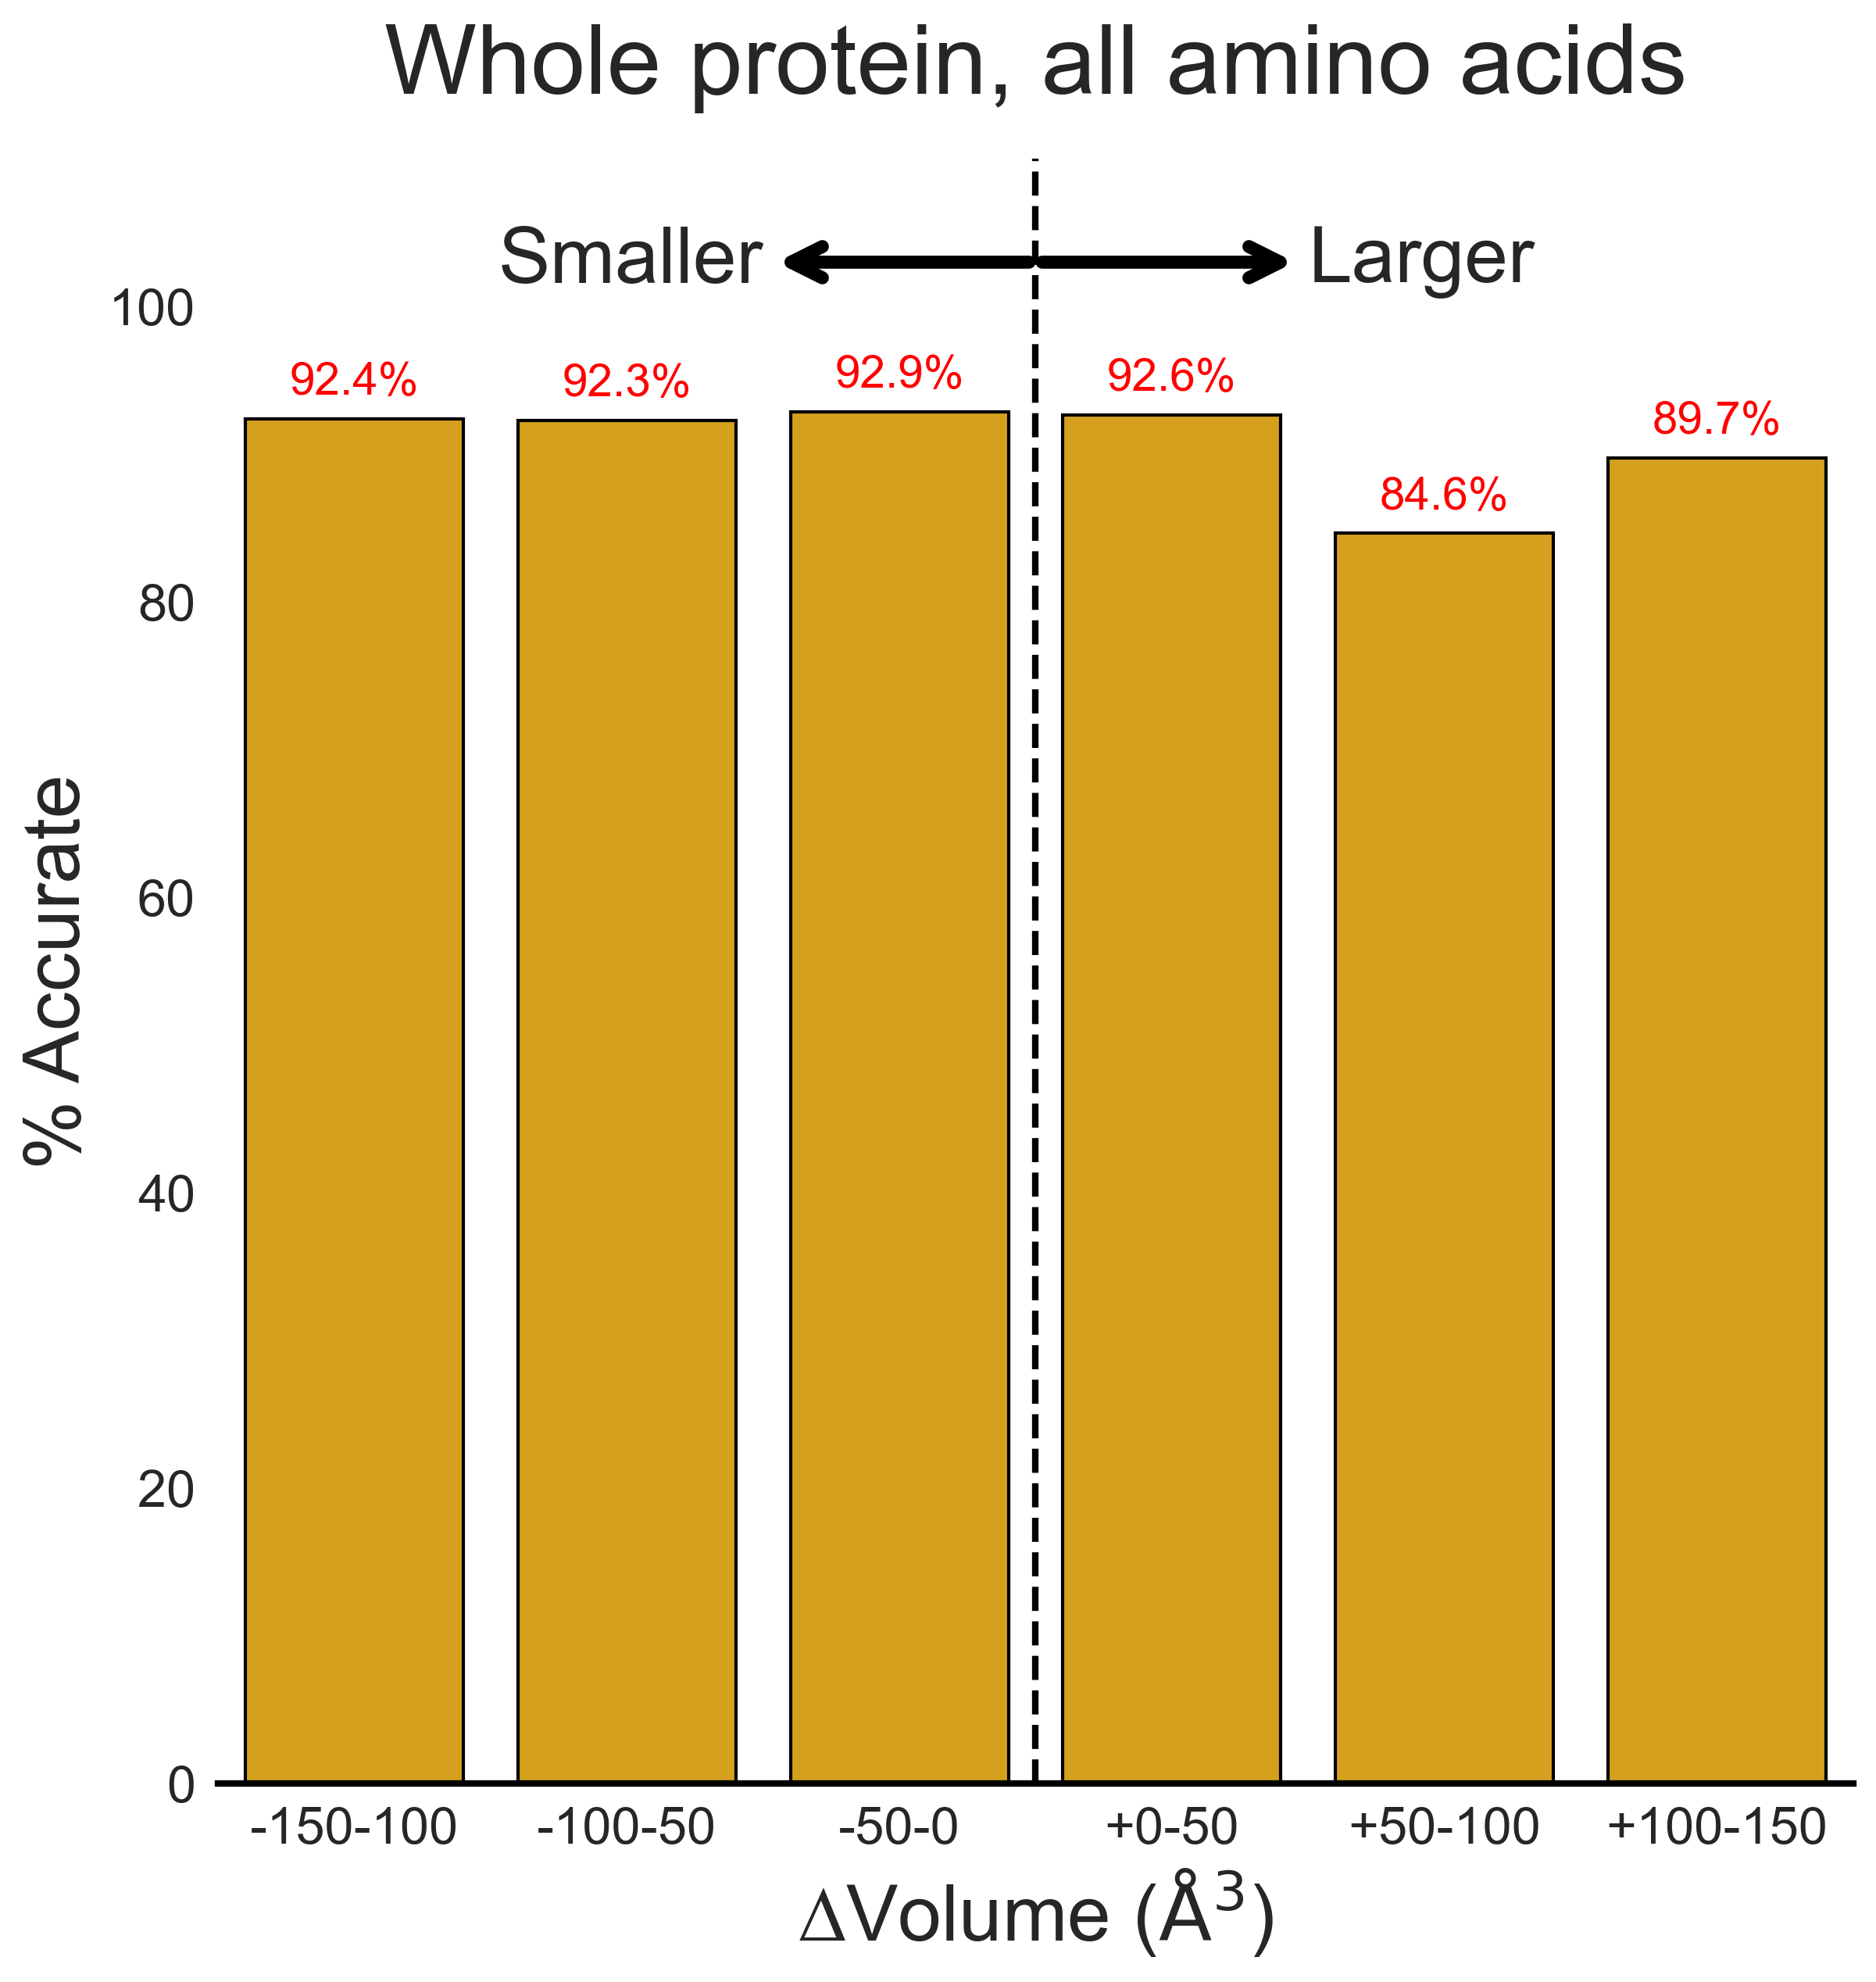

In [42]:
    
if metric == 'accuracy':
    
    fig, ax = plt.subplots(
        figsize=(9, 9), 
                           dpi=300
                           )
    
    sns.barplot(data=to_plot, x='bin', y='percent_agree', ax=ax, color='#F2AD00', edgecolor='black')
    
    for side in ['bottom']:
        ax.spines[side].set_color('black')
        ax.spines[side].set_linewidth(2)
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # x-coordinate: center of bar
            height + 1,                     # y-coordinate: slightly above the bar
            f'{height:.1f}%',               # label text
            ha='center', va='bottom', fontsize=14, color='red'
        )
    
    plt.xticks(rotation=360, ha='center')
    plt.xlabel(r'∆Volume ($\mathrm{\AA}^3$)', fontsize=24)
    plt.ylabel('% Accurate', fontsize=24)
    plt.ylim(0, 110)
    
    plt.grid(False)
    #plt.tight_layout()
    
    y_arrow = 103
    
    ax.axvline(x=2.5, color='black', linestyle='--', linewidth=2)
    # Left arrow (smaller volume mutations)
    ax.annotate('Smaller', xy=(2.5, y_arrow), xytext=(1.5, y_arrow),
                arrowprops=dict(arrowstyle='<-', color='black', lw=4),
                ha='right', va='center', fontsize=24)
    
    # Right arrow (larger volume mutations)
    ax.annotate('Larger', xy=(2.5, y_arrow), xytext=(3.5, y_arrow),
                arrowprops=dict(arrowstyle='<-', color='black', lw=4),
                ha='left', va='center', fontsize=24)
    
    plt.title('Whole protein, all amino acids', fontsize=30, pad=20)
    
    labels = ['-150-100', '-100-50', '-50-0', '+0-50', '+50-100', '+100-150']
    plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=labels, rotation=360, ha='center', fontsize=16)
    plt.yticks(fontsize=16)
    
    #plt.savefig(f'{results_dir}/wholeprotein_all_size.png', dpi=300, transparent=True)
    plt.show()

In [43]:
print(to_plot)

            bin  percent_agree
0  (-150, -100]      92.405063
1   (-100, -50]      92.307692
2      (-50, 0]      92.887029
3       (0, 50]      92.649903
4     (50, 100]      84.641638
5    (100, 150]      89.743590


In [44]:
if metric == 'correlation':
    labels = ['-150-100', '-100-50', '-50-0', '+0-50', '+50-100', '+100-150']
    to_plot['label'] = labels
    
    fig, ax = plt.subplots(
        figsize=(9, 9), 
                           dpi=300
                           )
    
    sns.barplot(data=to_plot, x='label', y='percent_agree', ax=ax, color='#fbbb5e', edgecolor='black')
    
    for side in ['bottom']:
        ax.spines[side].set_color('black')
        ax.spines[side].set_linewidth(2)
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # for p in ax.patches:
    #     height = p.get_height()
    #     ax.text(
    #         p.get_x() + p.get_width() / 2,  # x-coordinate: center of bar
    #         height + 1,                     # y-coordinate: slightly above the bar
    #         f'{height:.1f}%',               # label text
    #         ha='center', va='bottom', fontsize=14, color='red'
    #     )
    
    plt.xticks(rotation=360, ha='center')
    plt.xlabel(r'∆Volume ($\mathrm{\AA}^3$)', fontsize=24)
    plt.ylabel('Correlation', fontsize=24)
    plt.ylim(0, 0.65)
    
    plt.grid(False)
    #plt.tight_layout()
    
    y_arrow = 0.6
    
    ax.axvline(x=2.5, color='black', linestyle='--', linewidth=2)
    # Left arrow (smaller volume mutations)
    ax.annotate('Smaller', xy=(2.5, y_arrow), xytext=(1.5, y_arrow),
                arrowprops=dict(arrowstyle='<-', color='black', lw=4),
                ha='right', va='center', fontsize=24)
    
    # Right arrow (larger volume mutations)
    ax.annotate('Larger', xy=(2.5, y_arrow), xytext=(3.5, y_arrow),
                arrowprops=dict(arrowstyle='<-', color='black', lw=4),
                ha='left', va='center', fontsize=24)
    
    plt.title('Whole protein, hydrophobic amino acids', fontsize=30, pad=20)
    
    labels = ['-150-100', '-100-50', '-50-0', '+0-50', '+50-100', '+100-150']
    plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=labels, rotation=360, ha='center', fontsize=16)
    plt.yticks(fontsize=16)
    
    #plt.savefig(f'{results_dir}/whole_hydrophobes_corr.png', dpi=300, transparent=True)
    plt.show()

# 

---

In [45]:
# get their correlation

# per region
acc_intcore_df = acc_df[acc_df['is_interface_core'] == True]

acc_intbound_df = acc_df[acc_df['is_interface_boundary'] == True]

acc_moncore_df = acc_df[acc_df['is_monomer_core'] == True]

acc_monbound_df = acc_df[acc_df['is_monomer_boundary'] == True]

acc_monsurf_df = acc_df[acc_df['is_monomer_surface'] == True]

# per protein
acc_bcov_df = acc_df[acc_df['ssm_parent'] == protein_list[0]]

acc_motif_df = acc_df[acc_df['ssm_parent'] == protein_list[1]]

acc_ems_df = acc_df[acc_df['ssm_parent'] == protein_list[2]]

acc_longxing_df = acc_df[acc_df['ssm_parent'] == protein_list[3]]

acc_newr1_df = acc_df[acc_df['ssm_parent'] == protein_list[4]]


In [46]:
their_correlation = {'overall': [],
                  'intcore': [],
                  'intbound': [],
                  'monsurf': [],
                  'moncore': [],
                  'monbound': [],
                  'bcov': [],
                  'motif': [],
                  'ems': [],
                  'longxing': [],
                  'newr1': []}

their_correlation['overall'].append(pearsonr(acc_df['mean_delta_rosetta'], acc_df['delta_exp_ddg_center']).statistic)

their_correlation['intcore'].append(pearsonr(acc_intcore_df['mean_delta_rosetta'], acc_intcore_df['delta_exp_ddg_center']).statistic)

their_correlation['intbound'].append(pearsonr(acc_intbound_df['mean_delta_rosetta'], acc_intbound_df['delta_exp_ddg_center']).statistic)

their_correlation['monsurf'].append(pearsonr(acc_monsurf_df['mean_delta_rosetta'], acc_monsurf_df['delta_exp_ddg_center']).statistic)

their_correlation['moncore'].append(pearsonr(acc_moncore_df['mean_delta_rosetta'], acc_moncore_df['delta_exp_ddg_center']).statistic)

their_correlation['monbound'].append(pearsonr(acc_monbound_df['mean_delta_rosetta'], acc_monbound_df['delta_exp_ddg_center']).statistic)

their_correlation['bcov'].append(pearsonr(acc_bcov_df['mean_delta_rosetta'], acc_bcov_df['delta_exp_ddg_center']).statistic)

their_correlation['motif'].append(pearsonr(acc_motif_df['mean_delta_rosetta'], acc_motif_df['delta_exp_ddg_center']).statistic)

their_correlation['ems'].append(pearsonr(acc_ems_df['mean_delta_rosetta'], acc_ems_df['delta_exp_ddg_center']).statistic)

their_correlation['longxing'].append(pearsonr(acc_longxing_df['mean_delta_rosetta'], acc_longxing_df['delta_exp_ddg_center']).statistic)

their_correlation['newr1'].append(pearsonr(acc_newr1_df['mean_delta_rosetta'], acc_newr1_df['delta_exp_ddg_center']).statistic)

In [47]:
corrs = list(their_correlation.values())

In [48]:
max_corr = max(corrs)

In [49]:
min_corr = min(corrs)

WORKING ON hardrep__min__5


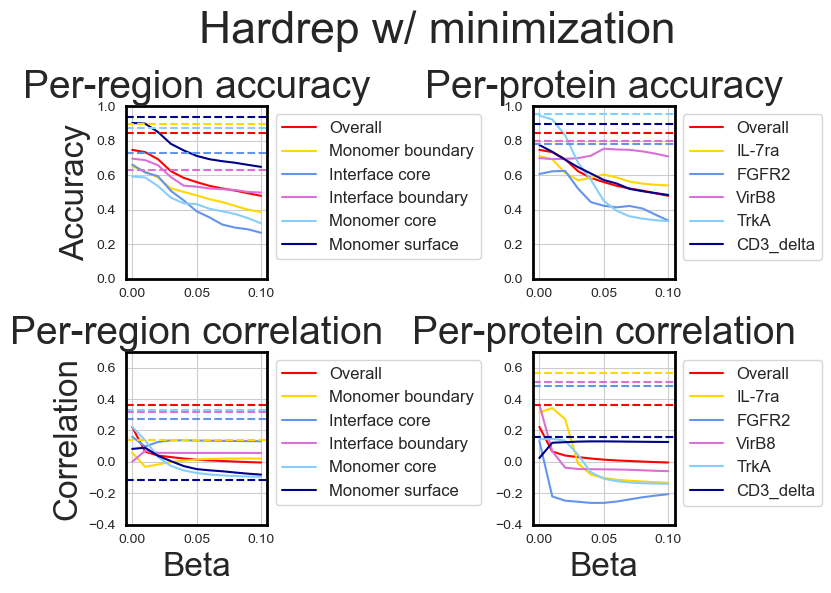

WORKING ON hardrep__nomin__5


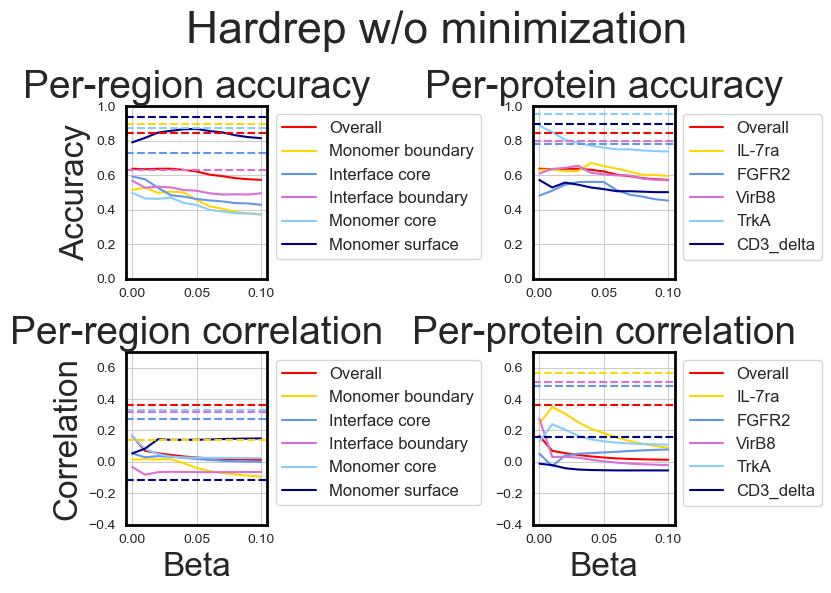

WORKING ON softrep__min__5


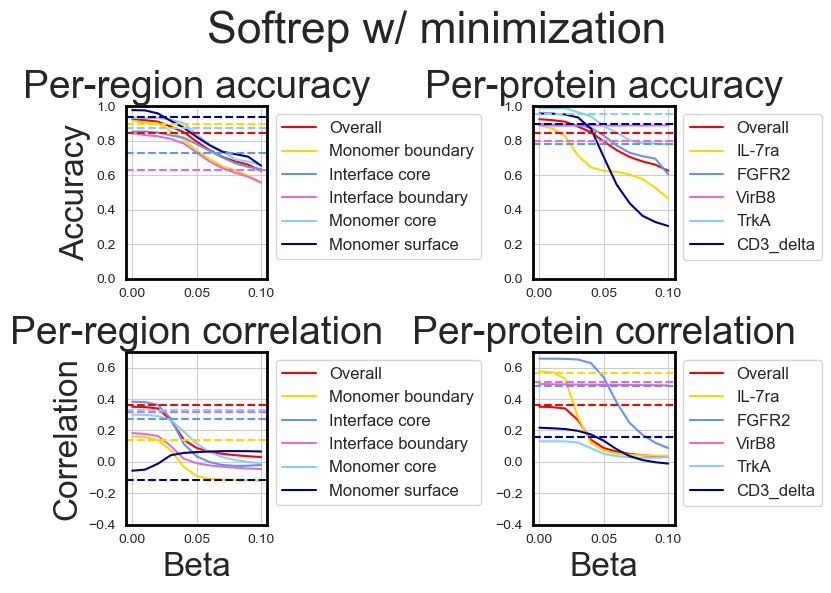

WORKING ON softrep__nomin__5


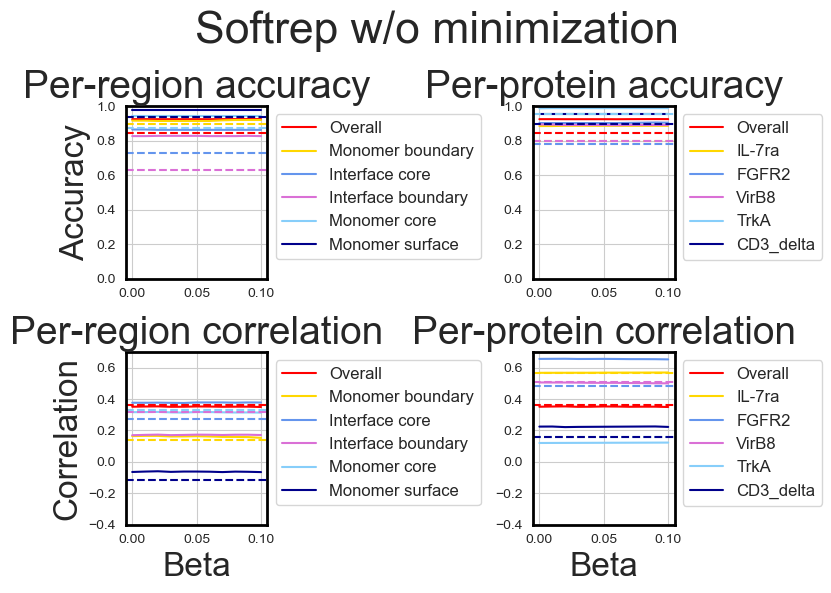

In [50]:

for i in range(4):
    
    
    file_of_interest = correlations[i]

    # make a dataframe and get the basename
    df = pd.read_csv(file_of_interest)
    name = os.path.basename(file_of_interest).replace('correlations_', '').replace('.sc', '')
    print(f'WORKING ON {name}')
    
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    alpha=1
    # 
    """
    PER-REGION ACCURACY
    """
        
    ax = axes[0, 0]
    sns.lineplot(x=df['beta'], y=df['accuracy'], ax=ax, label='Overall', color='red')
    sns.lineplot(x=df['beta'], y=df['accuracy_monbound'], ax=ax, label='Monomer boundary', color='gold', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_intcore'], ax=ax, label='Interface core', color='cornflowerblue')
    sns.lineplot(x=df['beta'], y=df['accuracy_intbound'], ax=ax, label='Interface boundary', color='orchid', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_moncore'], ax=ax, label='Monomer core', color='lightskyblue')
    sns.lineplot(x=df['beta'], y=df['accuracy_monsurf'], ax=ax, label='Monomer surface', color='darkblue', alpha=alpha)
    
    ax.spines['top'].set_linewidth(2)
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_linewidth(2)
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')
        
    ax.legend(bbox_to_anchor=(1, 1), fontsize=12)
    
    # horizontal lines for their data
    ax.axhline(y=their_accuracy['overall'][-1], linestyle='--', color='red')
    ax.axhline(y=their_accuracy['monbound'][-1], linestyle='--', color='gold', alpha=alpha)
    ax.axhline(y=their_accuracy['intcore'][-1], linestyle='--', color='cornflowerblue')
    ax.axhline(y=their_accuracy['intbound'][-1], linestyle='--', color='orchid', alpha=alpha)
    ax.axhline(y=their_accuracy['moncore'][-1], linestyle='--', color='lightskyblue')
    ax.axhline(y=their_accuracy['monsurf'][-1], linestyle='--', color='darkblue', alpha=alpha)
    
    ax.set_ylim(0, 1)
    
    ax.set_title('Per-region accuracy', fontsize=28)
    ax.set_xlabel('', fontsize=24)
    ax.set_ylabel('Accuracy', fontsize=24)
    
    
    """
    PER-REGION CORRELATION
    """
    
    
    
    alpha=1
    
    ax1 = axes[1, 0]
    
    sns.lineplot(x=df['beta'], y=df['correlation'], ax=ax1, label='Overall', color='red')
    sns.lineplot(x=df['beta'], y=df['correlation_monbound'], ax=ax1, label='Monomer boundary', color='gold', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_intcore'], ax=ax1, label='Interface core', color='cornflowerblue')
    sns.lineplot(x=df['beta'], y=df['correlation_intbound'], ax=ax1, label='Interface boundary', color='orchid', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_moncore'], ax=ax1, label='Monomer core', color='lightskyblue')
    sns.lineplot(x=df['beta'], y=df['correlation_monsurf'], ax=ax1, label='Monomer surface', color='darkblue', alpha=alpha)
    
    ax1.set_ylim(-0.4, 0.7)

    ax1.spines['top'].set_linewidth(2)
    ax1.spines['top'].set_color('black')
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['right'].set_color('black')
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['left'].set_color('black')
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['bottom'].set_color('black')
        
    ax1.legend(bbox_to_anchor=(1, 1), fontsize=12)
    
    # horizontal lines for their data
    ax1.axhline(y=their_correlation['overall'][-1], linestyle='--', color='red')
    ax1.axhline(y=their_correlation['monbound'][-1], linestyle='--', color='gold', alpha=alpha)
    ax1.axhline(y=their_correlation['intcore'][-1], linestyle='--', color='cornflowerblue')
    ax1.axhline(y=their_correlation['intbound'][-1], linestyle='--', color='orchid', alpha=alpha)
    ax1.axhline(y=their_correlation['moncore'][-1], linestyle='--', color='lightskyblue')
    ax1.axhline(y=their_correlation['monsurf'][-1], linestyle='--', color='darkblue', alpha=alpha)
        
    ax1.set_title('Per-region correlation', fontsize=28)
    ax1.set_xlabel('Beta', fontsize=24)
    ax1.set_ylabel('Correlation', fontsize=24)

    
    
    """
    PER-PROTEIN ACCURACY
    """

    ax2 = axes[0, 1]
    
    sns.lineplot(x=df['beta'], y=df['accuracy'], ax=ax2, label='Overall', color='red')
    sns.lineplot(x=df['beta'], y=df['accuracy_bcov'], ax=ax2, label=f'{protein_dict.get(protein_list[0])}', color='gold', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_motif'], ax=ax2, label=f'{protein_dict.get(protein_list[1])}', color='cornflowerblue')
    sns.lineplot(x=df['beta'], y=df['accuracy_ems'], ax=ax2, label=f'{protein_dict.get(protein_list[2])}', color='orchid', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_longxing'], ax=ax2, label=f'{protein_dict.get(protein_list[3])}', color='lightskyblue')
    sns.lineplot(x=df['beta'], y=df['accuracy_newr1'], ax=ax2, label=f'{protein_dict.get(protein_list[4])}', color='darkblue', alpha=alpha)
    
    if 2>1:
        ax2.spines['top'].set_linewidth(2)
        ax2.spines['top'].set_color('black')
        ax2.spines['right'].set_linewidth(2)
        ax2.spines['right'].set_color('black')
        ax2.spines['left'].set_linewidth(2)
        ax2.spines['left'].set_color('black')
        ax2.spines['bottom'].set_linewidth(2)
        ax2.spines['bottom'].set_color('black')

    ax2.legend(bbox_to_anchor=(1, 1), fontsize=12)

    # horizontal lines for their data
    ax2.axhline(y=their_accuracy['overall'][-1], linestyle='--', color='red')
    ax2.axhline(y=their_accuracy['bcov'][-1], linestyle='--', color='gold', alpha=alpha)
    ax2.axhline(y=their_accuracy['motif'][-1], linestyle='--', color='cornflowerblue')
    ax2.axhline(y=their_accuracy['ems'][-1], linestyle='--', color='orchid', alpha=alpha)
    ax2.axhline(y=their_accuracy['longxing'][-1], linestyle='--', color='lightskyblue')
    ax2.axhline(y=their_accuracy['newr1'][-1], linestyle='--', color='darkblue', alpha=alpha)

    ax2.set_ylim(0, 1)

    ax2.set_title('Per-protein accuracy', fontsize=28)
    ax2.set_xlabel('', fontsize=24)
    ax2.set_ylabel('', fontsize=24)


    """
    PER-PROTEIN CORRELATION
    """

    ax3 = axes[1, 1]

    sns.lineplot(x=df['beta'], y=df['correlation'], ax=ax3, label='Overall', color='red')
    sns.lineplot(x=df['beta'], y=df['correlation_bcov'], ax=ax3, label=f'{protein_dict.get(protein_list[0])}', color='gold', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_motif'], ax=ax3, label=f'{protein_dict.get(protein_list[1])}', color='cornflowerblue')
    sns.lineplot(x=df['beta'], y=df['correlation_ems'], ax=ax3, label=f'{protein_dict.get(protein_list[2])}', color='orchid', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_longxing'], ax=ax3, label=f'{protein_dict.get(protein_list[3])}', color='lightskyblue')
    sns.lineplot(x=df['beta'], y=df['correlation_newr1'], ax=ax3, label=f'{protein_dict.get(protein_list[4])}', color='darkblue', alpha=alpha)
    
    if 2>1:
        ax3.spines['top'].set_linewidth(2)
        ax3.spines['top'].set_color('black')
        ax3.spines['right'].set_linewidth(2)
        ax3.spines['right'].set_color('black')
        ax3.spines['left'].set_linewidth(2)
        ax3.spines['left'].set_color('black')
        ax3.spines['bottom'].set_linewidth(2)
        ax3.spines['bottom'].set_color('black')
       
    ax3.set_ylim(-0.4, 0.7)   
     
    ax3.legend(bbox_to_anchor=(1, 1), fontsize=12)
    
    # horizontal lines for their data
    ax3.axhline(y=their_correlation['overall'][-1], linestyle='--', color='red')
    ax3.axhline(y=their_correlation['bcov'][-1], linestyle='--', color='gold', alpha=alpha)
    ax3.axhline(y=their_correlation['motif'][-1], linestyle='--', color='cornflowerblue')
    ax3.axhline(y=their_correlation['ems'][-1], linestyle='--', color='orchid', alpha=alpha)
    ax3.axhline(y=their_correlation['longxing'][-1], linestyle='--', color='lightskyblue')
    ax3.axhline(y=their_correlation['newr1'][-1], linestyle='--', color='darkblue', alpha=alpha)
    
    ax3.set_title('Per-protein correlation', fontsize=28)

    ax3.set_xlabel('Beta', fontsize=24)
    ax3.set_ylabel('', fontsize=24)

    plt.suptitle(f'{naming_dict.get(name)}', fontsize=32)
    plt.tight_layout()
    #plt.savefig(f'{results_dir}/plots_{name}.pdf', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()

WORKING ON hardrep__min__5
accuracy overall per region
accuracy intcore
accuracy monomer bound
acucracy mon core
accuracy monomer sruf
correaltion overall per region
correlation intcore
correlation intbound
correlation monbound
correlation moncore
accuracy overall per protein
accuracy bcov
accuracy motif
accuracy ems
accuracy lonxing
accuracy newr1
correlation overall per protein
correlation bcov
correlation motif
correlation ems
correlation longxing
correlation newr1


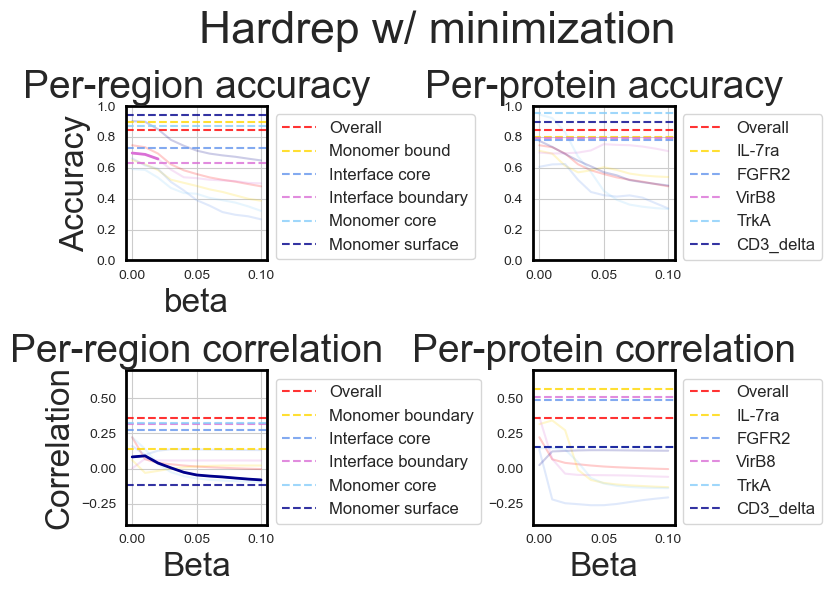

WORKING ON hardrep__nomin__5
accuracy overall per region
accuracy intcore
accuracy intbound
accuracy monomer bound
acucracy mon core
accuracy monomer sruf
correaltion overall per region
correlation intcore
correlation intbound
correlation monbound
correlation moncore
accuracy overall per protein
accuracy bcov
accuracy motif
accuracy ems
accuracy lonxing
accuracy newr1
correlation overall per protein
correlation bcov
correlation motif
correlation ems
correlation newr1


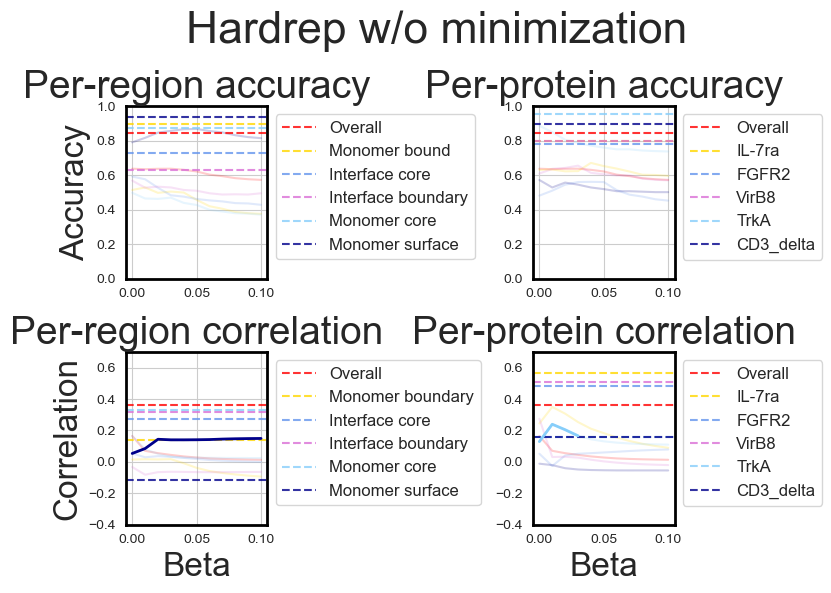

WORKING ON softrep__min__5
correaltion overall per region
correlation intbound
correlation moncore
correlation overall per protein
correlation ems
correlation longxing


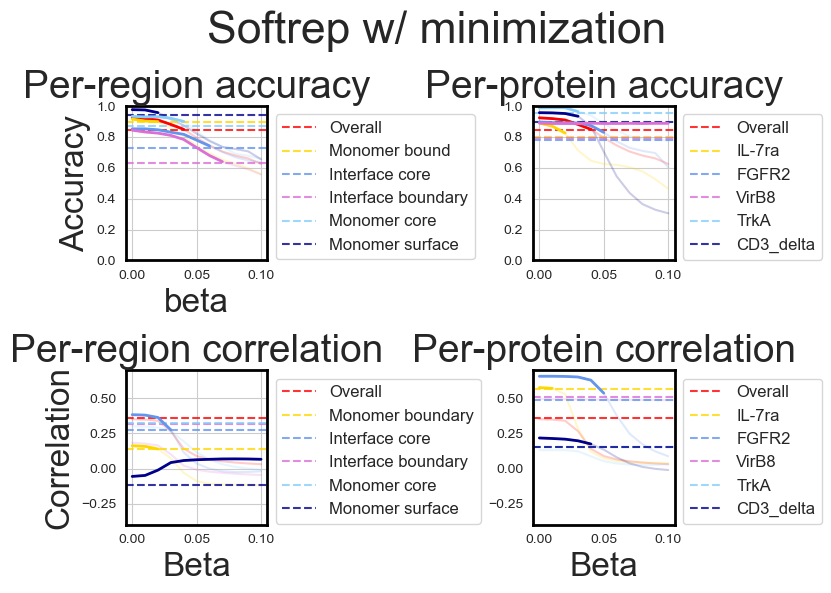

WORKING ON softrep__nomin__5
correaltion overall per region
correlation intbound
correlation moncore
correlation overall per protein
correlation ems
correlation longxing


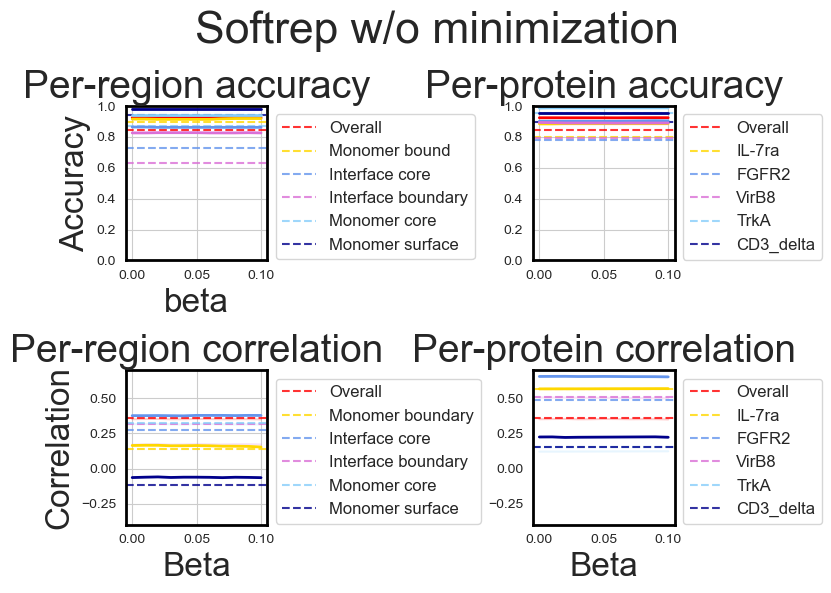

In [51]:
for i in range(4):

    file_of_interest = correlations[i]

    # make a dataframe and get the basename
    df = pd.read_csv(file_of_interest)
    name = os.path.basename(file_of_interest).replace('correlations_', '').replace('.sc', '')
    print(f'WORKING ON {name}')

    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    alpha=0.2
    alpha2=0.8

    """
    PER-REGION ACCURACY
    """

    ax = axes[0, 0]
    sns.lineplot(x=df['beta'], y=df['accuracy'], ax=ax, color='red', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_monbound'], ax=ax, color='gold', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_intcore'], ax=ax, color='cornflowerblue', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_intbound'], ax=ax, color='orchid', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_moncore'], ax=ax, color='lightskyblue', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_monsurf'], ax=ax, color='darkblue', alpha=alpha)

    ax.spines['top'].set_linewidth(2)
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_linewidth(2)
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['bottom'].set_color('black')

    # horizontal lines for their data
    ax.axhline(y=their_accuracy['overall'][-1], label='Overall', linestyle='--', color='red', alpha=alpha2)
    ax.axhline(y=their_accuracy['monbound'][-1], label='Monomer bound', linestyle='--', color='gold', alpha=alpha2)
    ax.axhline(y=their_accuracy['intcore'][-1], label='Interface core', linestyle='--', color='cornflowerblue', alpha=alpha2)
    ax.axhline(y=their_accuracy['intbound'][-1], label='Interface boundary', linestyle='--', color='orchid', alpha=alpha2)
    ax.axhline(y=their_accuracy['moncore'][-1], label='Monomer core', linestyle='--', color='lightskyblue', alpha=alpha2)
    ax.axhline(y=their_accuracy['monsurf'][-1], label='Monomer surface', linestyle='--', color='darkblue', alpha=alpha2)

    ax.set_ylim(0, 1)

    ax.set_title('Per-region accuracy', fontsize=28)
    ax.set_xlabel('', fontsize=24)
    ax.set_ylabel('Accuracy', fontsize=24)

    try:
        cutoff_overall1 = np.where(df['accuracy'] >= their_accuracy['overall'][-1])[-1][-1]
        cutoff_overall1 += 1
        sns.lineplot(x=df['beta'][:cutoff_overall1], y=df['accuracy'][:cutoff_overall1], ax=ax, color='red', linewidth=2, alpha=1)
    except:
        print('accuracy overall per region')
    try:
        cutoff_intcore1 = np.where(df['accuracy_intcore'] >= their_accuracy['intcore'][-1])[-1][-1]
        cutoff_intcore1 += 1
        sns.lineplot(x=df['beta'][:cutoff_intcore1], y=df['accuracy_intcore'][:cutoff_intcore1], ax=ax, color='cornflowerblue', linewidth=2, alpha=1)
    except:
        print('accuracy intcore')
    try:
        cutoff_intbound1 = np.where(df['accuracy_intbound'] >= their_accuracy['intbound'][-1])[-1][-1]
        cutoff_intbound1 += 1
        sns.lineplot(x=df['beta'][:cutoff_intbound1], y=df['accuracy_intbound'][:cutoff_intbound1], ax=ax, color='orchid', linewidth=2, alpha=1)
    except:
        print('accuracy intbound')
    try:
        cutoff_monbound1 = np.where(df['accuracy_monbound'] >= their_accuracy['monbound'][-1])[-1][-1]
        cutoff_monbound1 += 1
        sns.lineplot(x=df['beta'][:cutoff_monbound1], y=df['accuracy_monbound'][:cutoff_monbound1], ax=ax, color='gold', linewidth=2, alpha=1)
    except:
        print('accuracy monomer bound')
    try:
        cutoff_moncore1 = np.where(df['accuracy_moncore'] >= their_accuracy['moncore'][-1])[-1][-1]
        cutoff_moncore1 += 1
        sns.lineplot(x=df['beta'][:cutoff_moncore1], y=df['accuracy_moncore'][:cutoff_moncore1], ax=ax, color='lightskyblue', linewidth=2, alpha=1)
    except:
        print('acucracy mon core')
    try:
        cutoff_monsurf1 = np.where(df['accuracy_monsurf'] >= their_accuracy['monsurf'][-1])[-1][-1]
        cutoff_monsurf1 += 1
        sns.lineplot(x=df['beta'][:cutoff_monsurf1], y=df['accuracy_monsurf'][:cutoff_monsurf1], ax=ax, color='darkblue', linewidth=2, alpha=1)
    except:
        print('accuracy monomer sruf')

    ax.legend(bbox_to_anchor=(1, 1), fontsize=12)
    
    """
    PER-REGION CORRELATION
    """


    ax1 = axes[1, 0]

    sns.lineplot(x=df['beta'], y=df['correlation'], ax=ax1, color='red', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_monbound'], ax=ax1, color='gold', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_intcore'], ax=ax1, color='cornflowerblue', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_intbound'], ax=ax1, color='orchid', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_moncore'], ax=ax1, color='lightskyblue', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_monsurf'], ax=ax1, color='darkblue', alpha=alpha)

    ax1.set_ylim(-0.4, 0.7)

    ax1.spines['top'].set_linewidth(2)
    ax1.spines['top'].set_color('black')
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['right'].set_color('black')
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['left'].set_color('black')
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['bottom'].set_color('black')



    # horizontal lines for their data
    ax1.axhline(y=their_correlation['overall'][-1], linestyle='--', label='Overall', color='red', alpha=alpha2)
    ax1.axhline(y=their_correlation['monbound'][-1], linestyle='--', label='Monomer boundary', color='gold', alpha=alpha2)
    ax1.axhline(y=their_correlation['intcore'][-1], linestyle='--', label='Interface core', color='cornflowerblue', alpha=alpha2)
    ax1.axhline(y=their_correlation['intbound'][-1], linestyle='--', label='Interface boundary', color='orchid', alpha=alpha2)
    ax1.axhline(y=their_correlation['moncore'][-1], linestyle='--', label='Monomer core', color='lightskyblue', alpha=alpha2)
    ax1.axhline(y=their_correlation['monsurf'][-1], linestyle='--', label='Monomer surface', color='darkblue', alpha=alpha2)

    ax1.set_title('Per-region correlation', fontsize=28)
    ax1.set_xlabel('Beta', fontsize=24)
    ax1.set_ylabel('Correlation', fontsize=24)

    try:
        cutoff_overall2 = np.where(df['correlation'] >= their_correlation['overall'][-1])[-1][-1]
        cutoff_overall2 += 1
        sns.lineplot(x=df['beta'][:cutoff_overall2], y=df['accuracy'][:cutoff_overall2], ax=ax1, color='red', linewidth=2, alpha=1)
    except:
        print('correaltion overall per region')
    try:
        cutoff_intcore2 = np.where(df['correlation_intcore'] >= their_correlation['intcore'][-1])[-1][-1]
        cutoff_intcore2 += 1
        sns.lineplot(x=df['beta'][:cutoff_intcore2], y=df['correlation_intcore'][:cutoff_intcore2], ax=ax1, color='cornflowerblue', linewidth=2, alpha=1)
    except:
        print('correlation intcore')
    try:
        cutoff_intbound2 = np.where(df['correlation_intbound'] >= their_correlation['intbound'][-1])[-1][-1]
        cutoff_intbound2 += 1
        sns.lineplot(x=df['beta'][:cutoff_intbound2], y=df['correlation_intbound'][:cutoff_intbound2], ax=ax1, color='orchid', linewidth=2, alpha=1)
    except:
        print('correlation intbound')
    try:
        cutoff_monbound2 = np.where(df['correlation_monbound'] >= their_correlation['monbound'][-1])[-1][-1]
        cutoff_monbound2 += 1
        sns.lineplot(x=df['beta'][:cutoff_monbound2], y=df['correlation_monbound'][:cutoff_monbound2], ax=ax1, color='gold', linewidth=2, alpha=1)
    except:
        print('correlation monbound')
    try:
        cutoff_moncore2 = np.where(df['correlation_moncore'] >= their_correlation['moncore'][-1])[-1][-1]
        cutoff_moncore2 += 1
        sns.lineplot(x=df['beta'][:cutoff_moncore2], y=df['correlation_moncore'][:cutoff_moncore2], ax=ax1, color='lightskyblue', linewidth=2, alpha=1)
    except:
        print('correlation moncore')
    try:
        cutoff_monsurf2 = np.where(df['correlation_monsurf'] >= their_correlation['monsurf'][-1])[-1][-1]
        cutoff_monsurf2 += 1
        sns.lineplot(x=df['beta'][:cutoff_monsurf2], y=df['correlation_monsurf'][:cutoff_monsurf2], ax=ax1, color='darkblue', linewidth=2, alpha=1)
    except:
        print('correlation monsurf')

    ax1.legend(bbox_to_anchor=(1, 1), fontsize=12)
    
    
    """
    PER-PROTEIN ACCURACY
    """

    ax2 = axes[0, 1]

    sns.lineplot(x=df['beta'], y=df['accuracy'], ax=ax2,color='red', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_bcov'], ax=ax2, color='gold', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_motif'], ax=ax2, color='cornflowerblue', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_ems'], ax=ax2, color='orchid', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_longxing'], ax=ax2, color='lightskyblue', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['accuracy_newr1'], ax=ax2, color='darkblue', alpha=alpha)

    if 2>1:
        ax2.spines['top'].set_linewidth(2)
        ax2.spines['top'].set_color('black')
        ax2.spines['right'].set_linewidth(2)
        ax2.spines['right'].set_color('black')
        ax2.spines['left'].set_linewidth(2)
        ax2.spines['left'].set_color('black')
        ax2.spines['bottom'].set_linewidth(2)
        ax2.spines['bottom'].set_color('black')

    # horizontal lines for their data
    ax2.axhline(y=their_accuracy['overall'][-1], linestyle='--', label='Overall', color='red', alpha=alpha2)
    ax2.axhline(y=their_accuracy['bcov'][-1], linestyle='--', label=f'{protein_dict.get(protein_list[0])}', color='gold', alpha=alpha2)
    ax2.axhline(y=their_accuracy['motif'][-1], linestyle='--', label=f'{protein_dict.get(protein_list[1])}', color='cornflowerblue', alpha=alpha2)
    ax2.axhline(y=their_accuracy['ems'][-1], linestyle='--', label=f'{protein_dict.get(protein_list[2])}', color='orchid', alpha=alpha2)
    ax2.axhline(y=their_accuracy['longxing'][-1], linestyle='--', label=f'{protein_dict.get(protein_list[3])}', color='lightskyblue', alpha=alpha2)
    ax2.axhline(y=their_accuracy['newr1'][-1], linestyle='--', label=f'{protein_dict.get(protein_list[4])}', color='darkblue', alpha=alpha2)

    ax2.set_ylim(0, 1)

    ax2.set_title('Per-protein accuracy', fontsize=28)

    try:
        cutoff_overall3 = np.where(df['accuracy'] >= their_accuracy['overall'][-1])[-1][-1]
        cutoff_overall3 += 1
        sns.lineplot(x=df['beta'][:cutoff_overall3], y=df['accuracy'][:cutoff_overall3], ax=ax2, color='red', linewidth=2, alpha=1)
    except:
        print('accuracy overall per protein')
    try:
        cutoff_bcov1 = np.where(df['accuracy_bcov'] >= their_accuracy['bcov'][-1])[-1][-1]
        cutoff_bcov1 += 1
        sns.lineplot(x=df['beta'][:cutoff_bcov1], y=df['accuracy_bcov'][:cutoff_bcov1], ax=ax2, color='gold', linewidth=2, alpha=1)
    except:
        print('accuracy bcov')
    try:
        cutoff_motif1 = np.where(df['accuracy_motif'] >= their_accuracy['motif'][-1])[-1][-1]
        cutoff_motif1 += 1
        sns.lineplot(x=df['beta'][:cutoff_motif1], y=df['accuracy_motif'][:cutoff_motif1], ax=ax2, color='cornflowerblue', linewidth=2, alpha=1)
    except:
        print('accuracy motif')
    try:
        cutoff_ems1 = np.where(df['accuracy_ems'] >= their_accuracy['ems'][-1])[-1][-1]
        cutoff_ems1 += 1
        sns.lineplot(x=df['beta'][:cutoff_ems1], y=df['accuracy_ems'][:cutoff_ems1], ax=ax2, color='orchid', linewidth=2, alpha=1)
    except:
        print('accuracy ems')
    try:
        cutoff_longxing1 = np.where(df['accuracy_longxing'] >= their_accuracy['longxing'][-1])[-1][-1]
        cutoff_longxing1 += 1
        sns.lineplot(x=df['beta'][:cutoff_longxing1], y=df['accuracy_longxing'][:cutoff_longxing1], ax=ax2, color='lightskyblue', linewidth=2, alpha=1)
    except:
        print('accuracy lonxing')
    try:
        cutoff_newr11 = np.where(df['accuracy_newr1'] >= their_accuracy['newr1'][-1])[-1][-1]
        cutoff_newr11 += 1
        sns.lineplot(x=df['beta'][:cutoff_newr11], y=df['accuracy_newr1'][:cutoff_newr11], ax=ax2, color='darkblue', linewidth=2, alpha=1)
    except:
        print('accuracy newr1')
        
    ax2.legend(bbox_to_anchor=(1, 1), fontsize=12)
    ax2.set_xlabel('', fontsize=24)
    ax2.set_ylabel('', fontsize=24)
    
    """
    PER-PROTEIN CORRELATION
    """

    ax3 = axes[1, 1]

    sns.lineplot(x=df['beta'], y=df['correlation'], ax=ax3, color='red', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_bcov'], ax=ax3, color='gold', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_motif'], ax=ax3, color='cornflowerblue', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_ems'], ax=ax3, color='orchid', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_longxing'], ax=ax3, color='lightskyblue', alpha=alpha)
    sns.lineplot(x=df['beta'], y=df['correlation_newr1'], ax=ax3, color='darkblue', alpha=alpha)

    if 2>1:
        ax3.spines['top'].set_linewidth(2)
        ax3.spines['top'].set_color('black')
        ax3.spines['right'].set_linewidth(2)
        ax3.spines['right'].set_color('black')
        ax3.spines['left'].set_linewidth(2)
        ax3.spines['left'].set_color('black')
        ax3.spines['bottom'].set_linewidth(2)
        ax3.spines['bottom'].set_color('black')

    ax3.set_ylim(-0.4, 0.7)

    # horizontal lines for their data
    ax3.axhline(y=their_correlation['overall'][-1], linestyle='--', label='Overall', color='red', alpha=alpha2)
    ax3.axhline(y=their_correlation['bcov'][-1], linestyle='--', label=f'{protein_dict.get(protein_list[0])}', color='gold', alpha=alpha2)
    ax3.axhline(y=their_correlation['motif'][-1], linestyle='--', label=f'{protein_dict.get(protein_list[1])}', color='cornflowerblue', alpha=alpha2)
    ax3.axhline(y=their_correlation['ems'][-1], linestyle='--', label=f'{protein_dict.get(protein_list[2])}', color='orchid', alpha=alpha2)
    ax3.axhline(y=their_correlation['longxing'][-1], linestyle='--', label=f'{protein_dict.get(protein_list[3])}', color='lightskyblue', alpha=alpha2)
    ax3.axhline(y=their_correlation['newr1'][-1], linestyle='--', label=f'{protein_dict.get(protein_list[4])}', color='darkblue', alpha=alpha2)

    ax3.set_title('Per-protein correlation', fontsize=28)


    try:
        cutoff_overall4 = np.where(df['correlation'] >= their_correlation['overall'][-1])[-1][-1]
        cutoff_overall4 += 1
        sns.lineplot(x=df['beta'][:cutoff_overall4], y=df['accuracy'][:cutoff_overall4], ax=ax3, color='red', linewidth=2, alpha=1)
    except:
        print('correlation overall per protein')
    try:
        cutoff_bcov4 = np.where(df['correlation_bcov'] >= their_correlation['bcov'][-1])[-1][-1]
        cutoff_bcov4 += 1
        sns.lineplot(x=df['beta'][:cutoff_bcov4], y=df['correlation_bcov'][:cutoff_bcov4], ax=ax3, color='gold', linewidth=2, alpha=1)
    except:
        print('correlation bcov')
    try:
        cutoff_motif4 = np.where(df['correlation_motif'] >= their_correlation['motif'][-1])[-1][-1]
        cutoff_motif4 += 1
        sns.lineplot(x=df['beta'][:cutoff_motif4], y=df['correlation_motif'][:cutoff_motif4], ax=ax3, color='cornflowerblue', linewidth=2, alpha=1)
    except:
        print('correlation motif')
    try:
        cutoff_ems4 = np.where(df['correlation_ems'] >= their_correlation['ems'][-1])[-1][-1]
        cutoff_ems4 += 1
        sns.lineplot(x=df['beta'][:cutoff_ems4], y=df['correlation_ems'][:cutoff_ems4], ax=ax3, color='orchid', linewidth=2, alpha=1)
    except:
        print('correlation ems')
    try:
        cutoff_longxing4 = np.where(df['correlation_longxing'] >= their_correlation['longxing'][-1])[-1][-1]
        cutoff_longxing4 += 1
        sns.lineplot(x=df['beta'][:cutoff_longxing4], y=df['correlation_longxing'][:cutoff_longxing4], ax=ax3, color='lightskyblue', linewidth=2, alpha=1)
    except:
        print('correlation longxing')
    try:
        cutoff_newr14 = np.where(df['correlation_newr1'] >= their_correlation['newr1'][-1])[-1][-1]
        cutoff_newr14 += 1
        sns.lineplot(x=df['beta'][:cutoff_newr14], y=df['correlation_newr1'][:cutoff_newr14], ax=ax3, color='darkblue', linewidth=2, alpha=1)
    except:
        print('correlation newr1')
        
    ax3.legend(bbox_to_anchor=(1, 1), fontsize=12)
    ax3.set_xlabel('Beta', fontsize=24)
    ax3.set_ylabel('', fontsize=24)

    plt.grid(False)
    plt.suptitle(f'{naming_dict.get(name)}', fontsize=32)
    plt.tight_layout()
    #plt.savefig(f'{results_dir}/plots_{name}.pdf', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()